In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv("/Users/user/Downloads/train.csv")
df.head(10)
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [3]:
for column in df:
    print(df[column].nunique())

15035
365
3263
11
29
863
7678
6
2
5
5
12
789
271
116
65
70
4692
716
682
6958


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


LinAlgError: singular matrix

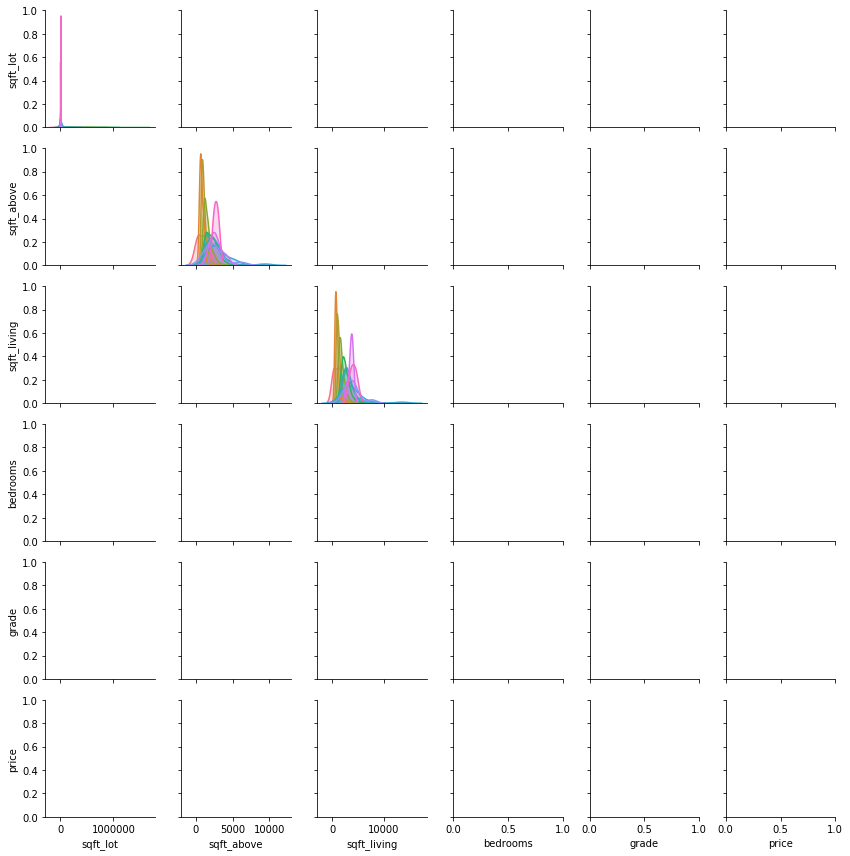

In [6]:
cols=['sqft_lot','sqft_above', 'sqft_living',
      'bedrooms', 'grade','price']
sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue='bedrooms',size=2)

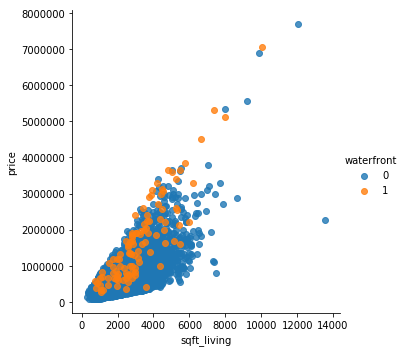

In [20]:
sns.lmplot(x='sqft_living', y='price', hue='waterfront', data=df, fit_reg=False)

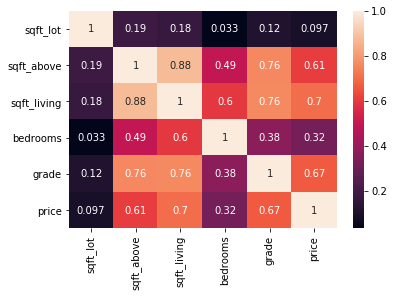

In [22]:
sns.heatmap(df[cols].corr(), annot=True)

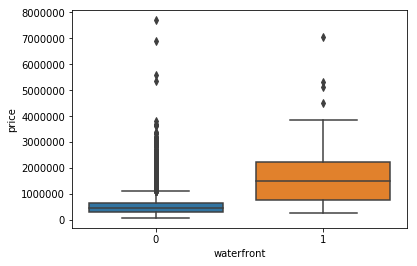

In [25]:
sns.boxplot(x=df['waterfront'], y=df['price'])

[(0, 250000)]

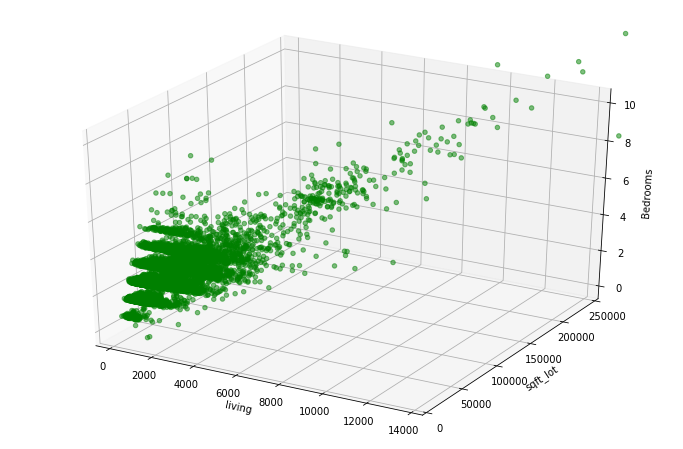

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#방수, 면적, 집크기 => 시각화(3차원)
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df['sqft_living'], df['sqft_lot'], 
           df['bedrooms'], c='green', alpha=.5)
ax.set(xlabel='living', ylabel='sqft_lot', zlabel='Bedrooms')
ax.set(ylim=[0,250000])


In [8]:
from sklearn.model_selection import train_test_split
train_df1, train_df2=train_test_split(df, train_size=0.8, random_state=42)
print(df.shape)
print(train_df1.shape)
print(train_df2.shape)

(15035, 21)
(12028, 21)
(3007, 21)


In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
model=LinearRegression()
score=model.fit(train_df1[['sqft_living']], train_df1[['price']])
#모델 작성 끝

## 회귀분석 모델 평가(결정계수, R square)

In [ ]:
* 실제값-예측값=잔차의 제곱의 합을 최소화
* 0<= 결정 계수 <=1
Q:전체 데이터의 편차 제곱의 합
Qe: 전체 데이터의 잔차 제곱의 합

#결정계수(R2)=(Q-Qe)/Q
LinearRegression 클래스의 score를 통해 결정계수를 구할 수 있다

In [21]:
model.score(train_df2[['sqft_living']],train_df2[['price']])
print(score,'.3f')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) .3f


In [16]:
print(model.intercept_) # w값
print(model.coef_) # b값

[-53539.43162226]
[[284.98912866]]


## 분류 모델에 대한 평가 (혼동행렬)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
xtrue=[2,0,2,2,0,1]
xpred=[0,0,2,2,0,2]
confusion_matrix(xtrue,xpred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

## 이진분류(positive/negative)

In [ ]:
ex)불량품 분류기(불량품을 양성, 정상품을 음성)
-TP: 불량품을 불량품으로 맞게 예측
-TN: 정상품을 정상품으로 맞게 예측
-FP: 정상품을 불량품으로 틀리게 예측
-FN: 불량품을 정상품으로 틀리게 예측

In [ ]:
xtrue=[1,0,1,1,0,1]
xpred=[0,0,1,1,0,1]
confusion_matrix(xtrue,xpred)

In [ ]:
정확도 = (TP+TN)/(TP+TN+FP+FN)
정밀도 =TP/(TP+FP)
재현율 =TP/(TP+FN)
F점수

In [22]:
model.fit(train_df1[['sqft_living','bedrooms','bathrooms']], train_df1[['price']])
score=model.score(train_df2[['sqft_living','bedrooms','bathrooms']],train_df2[['price']])
print(format(score,'.3f'))

0.496


In [ ]:
## KNN 알고리즘으로 예측

In [28]:
features=["sqft_living","bedrooms","bathrooms","sqft_lot","floors","zipcode","view","waterfront","grade","yr_built"]

In [36]:
# from sklearn.neighbors import KNeighborsRegressor
# model=KNeighborsRegressor(n_neighbors=9)
# model.fit(train_df1[features],train_df1['price'])
# model.score(train_df2[features],train_df1['price'])
# print(format(score,'.3f'))
# predicted=model.predict(train_df2[features])
# print(predicted)

from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=9)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.501
[307911.11111111 369944.44444444 571233.33333333 ... 317907.77777778
 411888.88888889 336888.88888889]


In [ ]:
# desicion tree 알고리즘 => 예측

In [31]:
model=DecisionTreeRegressor(random_state=42)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.577
[208000. 235000. 642000. ... 259000. 530000. 455000.]


In [32]:
# random forest 알고리즘 => 예측

In [34]:
model=RandomForestRegressor(random_state=42, n_estimators=27)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.793
[298496.2962963  276498.14814815 559725.92592593 ... 339377.33333333
 506681.48148148 428766.66666667]


In [ ]:
testdf=pd.read_csv("test.csv")
testdf.shape
predicted=model.predict(testdf[features])
ss=pd.read_csv("sample_submission.csv")
ss['price']=predicted
ss.to_csv("sub_file.csv", index=False)

In [37]:
import tensorflow as tf

In [47]:
xdata=[[1,2],
      [2,3],
      [3,1],
      [4,3],
      [5,3],
      [6,2]]
ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]]

In [51]:
x=tf.placeholder(tf.float32,shape=[None,2])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')
# 출력 결과 1개
# [None,2] [2,1] +[1] = [1]
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(((y*tf.log(hf)))+(1-y)*(tf.log(1-hf)))

In [52]:
predicted=tf.cast(hf>0.5,dtype=tf.float32) # true면 1.0 false면 0.0으로 출력된다
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy= tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train,cost],feed_dict={x:xdata,y:ydata})
        if step %200 ==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted,accuracy],feed_dict={x:xdata,y:ydata})
    print("hf:",hv,"predict:",pv,"accuracy:",av)

0 2.6407444
200 0.44809774
400 0.43257606
600 0.41787502
800 0.40391874
1000 0.39065608
1200 0.37804604
1400 0.3660539
1600 0.35464767
1800 0.34379753
2000 0.33347467
2200 0.32365158
2400 0.31430146
2600 0.3053988
2800 0.29691905
3000 0.2888387
3200 0.2811354
3400 0.27378786
3600 0.2667761
3800 0.26008108
4000 0.25368473
4200 0.2475701
4400 0.24172156
4600 0.23612396
4800 0.23076338
5000 0.22562654
5200 0.2207011
5400 0.21597569
5600 0.21143906
5800 0.20708133
6000 0.2028929
6200 0.19886471
6400 0.1949885
6600 0.19125633
6800 0.18766083
7000 0.18419509
7200 0.18085253
7400 0.1776271
7600 0.17451315
7800 0.1715051
8000 0.16859801
8200 0.16578697
8400 0.16306761
8600 0.16043563
8800 0.15788709
9000 0.1554181
9200 0.1530252
9400 0.15070502
9600 0.14845441
9800 0.14627032
10000 0.14414997
hf: [[0.02852367]
 [0.15572824]
 [0.2940826 ]
 [0.78635323]
 [0.9426652 ]
 [0.9812112 ]] predict: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] accuracy: 1.0


In [56]:
xy=np.loadtxt("/Users/user/Downloads/diabetes.csv",delimiter=',')
xy
xdata=xy[:,0:-1] # 0:-1은 0번부터 맨마지막 앞까지 추출
ydata=xy[:,[-1]] #[-1]은 맨마지막 열을 추출
xdata.shape
ydata.shape

(759, 1)

In [59]:
x=tf.placeholder(tf.float32,shape=[None,8])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([8,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [64]:
predicted=tf.cast(hf>0.5,dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [66]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv = sess.run([train,cost],feed_dict={x:xdata,y:ydata})
        if step %200 ==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted,accuracy],feed_dict={x:xdata,y:ydata})
    print("hf:",hv,"predict:",pv,"accuracy:",av)

0 0.83566886
200 0.7690437
400 0.7370537
600 0.7126043
800 0.69132537
1000 0.67233235
1200 0.65531075
1400 0.6400481
1600 0.6263593
1800 0.6140755
2000 0.6030427
2200 0.59312165
2400 0.58418745
2600 0.5761285
2800 0.5688455
3000 0.56225073
3200 0.5562667
3400 0.5508252
3600 0.5458662
3800 0.5413371
4000 0.53719133
4200 0.53338844
4400 0.5298926
4600 0.5266724
4800 0.52370006
5000 0.5209513
5200 0.51840425
5400 0.5160401
5600 0.5138418
5800 0.5117942
6000 0.5098841
6200 0.50809944
6400 0.5064296
6600 0.50486493
6800 0.50339687
7000 0.50201774
7200 0.5007205
7400 0.4994989
7600 0.4983472
7800 0.4972602
8000 0.49623334
8200 0.4952622
8400 0.49434295
8600 0.4934721
8800 0.49264622
9000 0.49186242
9200 0.49111792
9400 0.4904103
9600 0.48973712
9800 0.48909625
10000 0.48848575
10200 0.48790383
10400 0.48734868
10600 0.4868188
10800 0.48631266
11000 0.48582911
11200 0.48536655
11400 0.4849242
11600 0.48450068
11800 0.484095
12000 0.48370636
12200 0.4833337
12400 0.48297626
12600 0.48263332
12